In [1]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Normalize
from torch.utils.data import DataLoader

device = 'cuda'
transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])

datasets = {
    'train': MNIST(root='data', train=True, download=True, transform=transform),
    'test': MNIST(root='data', train=False, download=True, transform=transform)
}

In [2]:
from torch import Tensor
from torch.nn import Module
from torch.nn import Flatten,  Sequential
from torch.nn import Linear, ReLU, Dropout
from model.dropconnect import DropConnectLinear, DropConnectBatchAverage

class Perceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            Linear(input_features, hidden_dimension),
            ReLU(),
            Dropout(p),
            Linear(hidden_dimension, output_features),
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)
            

class DropConnectPerceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            DropConnectLinear(input_features, hidden_dimension, p=p, max_batch_size=256),
            ReLU(),
            DropConnectBatchAverage(),
            DropConnectLinear(hidden_dimension, output_features, p=p, max_batch_size=256),
            ReLU(),
            DropConnectBatchAverage()
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)

In [3]:
from uuid import uuid4

import torch
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
torch.set_float32_matmul_precision('high')   

from utils import run
from metrics import Summary

In [4]:
loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=64,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=64,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

Running experiment Perceptron with id 0cf71de7-dd54-42da-866e-b2b6cbd20877
Tensorboard logs are saved in logs/Perceptron-0cf71de7-dd54-42da-866e-b2b6cbd20877
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntropy

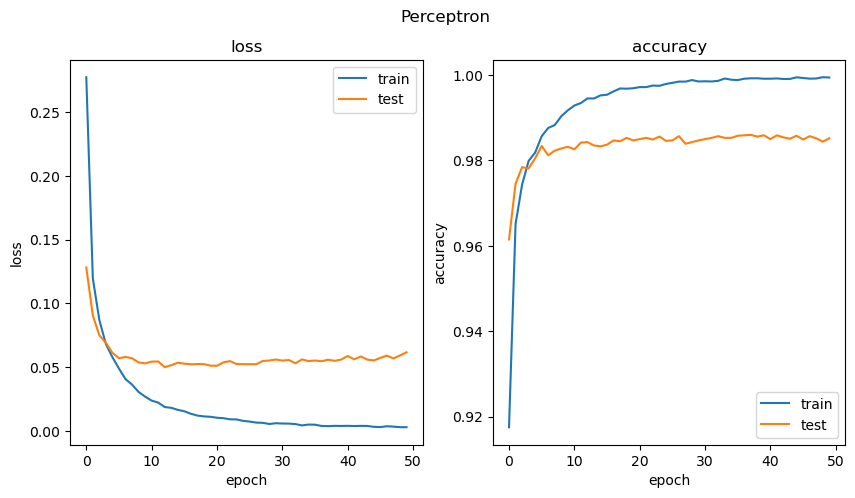

Running experiment DropConnectPerceptron with id 0cf71de7-dd54-42da-866e-b2b6cbd20877
Tensorboard logs are saved in logs/DropConnectPerceptron-0cf71de7-dd54-42da-866e-b2b6cbd20877
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maxi

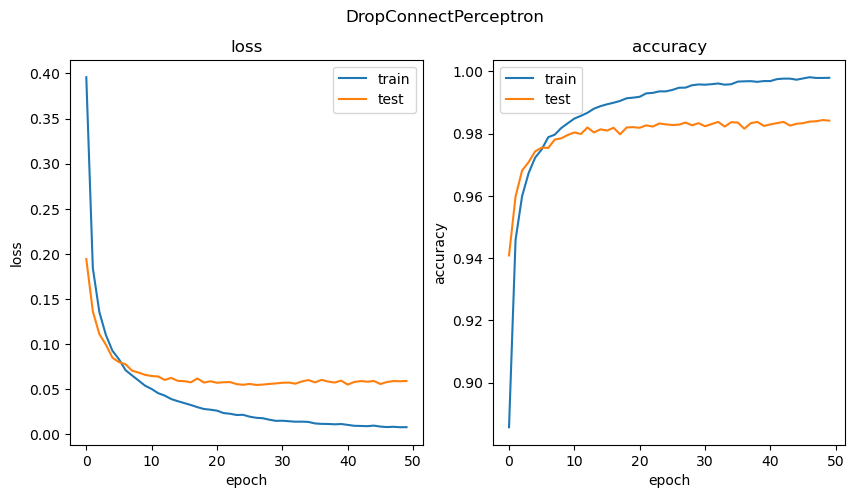

In [5]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id 0cf71de7-dd54-42da-866e-b2b6cbd20877

#### Results for Perceptron:
- Average loss: 0.0029 (train), 0.0616 (test)
- Average accuracy: 0.9994 (train), 0.9852 (test)

#### Results for DropConnectPerceptron:
- Average loss: 0.0080 (train), 0.0591 (test)
- Average accuracy: 0.9980 (train), 0.9842 (test)

Running experiment Perceptron with id 0eaddbff-478f-40da-8038-d24de7d03cd6
Tensorboard logs are saved in logs/Perceptron-0eaddbff-478f-40da-8038-d24de7d03cd6
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntropy

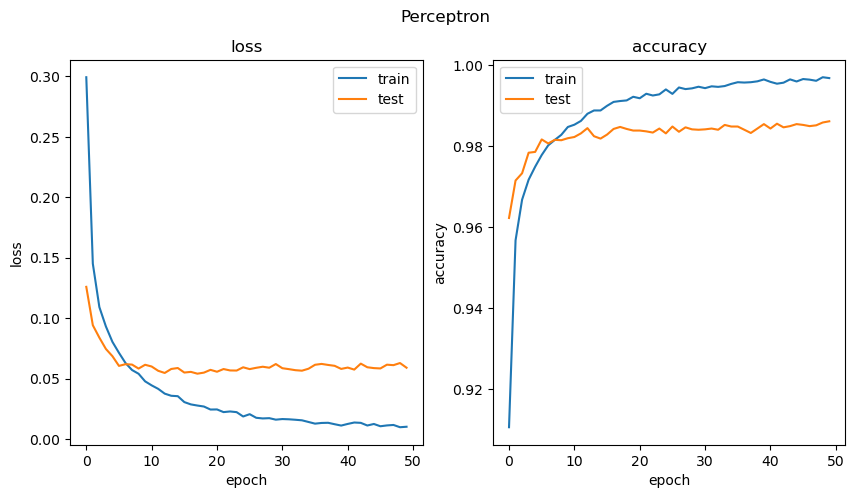

Running experiment DropConnectPerceptron with id 0eaddbff-478f-40da-8038-d24de7d03cd6
Tensorboard logs are saved in logs/DropConnectPerceptron-0eaddbff-478f-40da-8038-d24de7d03cd6
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maxi

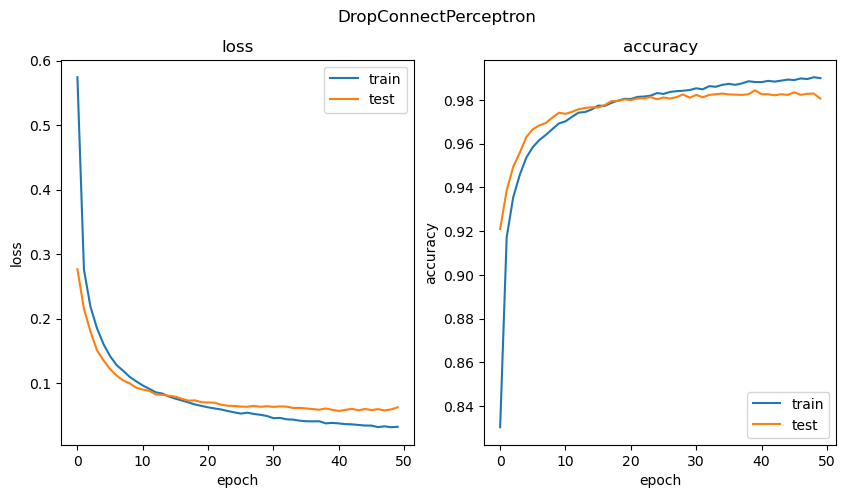

In [6]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id 0eaddbff-478f-40da-8038-d24de7d03cd6

#### Results for Perceptron:
- Average loss: 0.0101 (train), 0.0590 (test)
- Average accuracy: 0.9968 (train), 0.9862 (test)

#### Results for DropConnectPerceptron:
- Average loss: 0.0322 (train), 0.0625 (test)
- Average accuracy: 0.9899 (train), 0.9806 (test)

Running experiment Perceptron with id a9911543-46b8-4de9-971f-49549314a05b
Tensorboard logs are saved in logs/Perceptron-a9911543-46b8-4de9-971f-49549314a05b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntropy

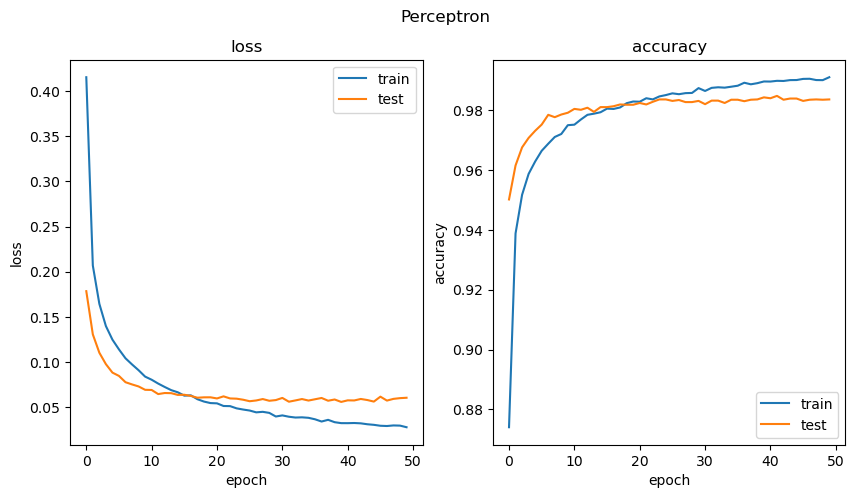

In [11]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)

### Runing experiment with id 0eaddbff-478f-40da-8038-d24de7d03cd6

#### Results for Perceptron:

#### Results for DropConnectPerceptron:

Running experiment Perceptron with id f88a1326-cd54-4504-96c0-243e11943258
Tensorboard logs are saved in logs/Perceptron-f88a1326-cd54-4504-96c0-243e11943258
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.99
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntro

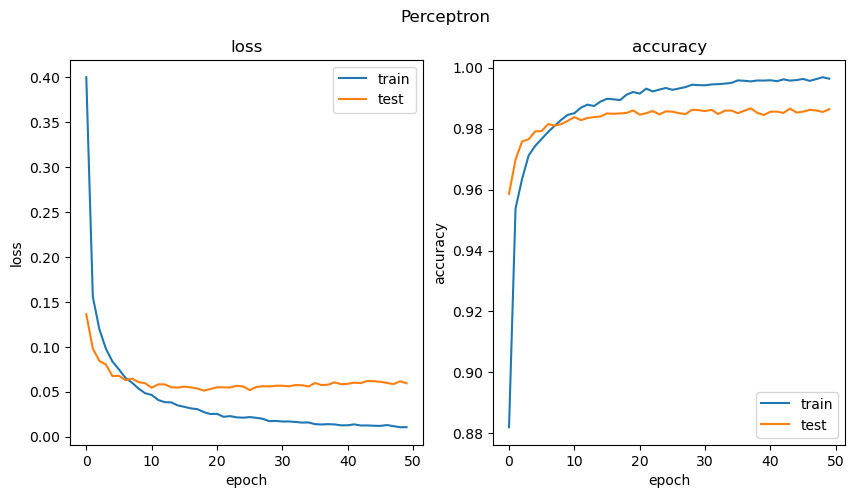

Running experiment DropConnectPerceptron with id f88a1326-cd54-4504-96c0-243e11943258
Tensorboard logs are saved in logs/DropConnectPerceptron-f88a1326-cd54-4504-96c0-243e11943258
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    max

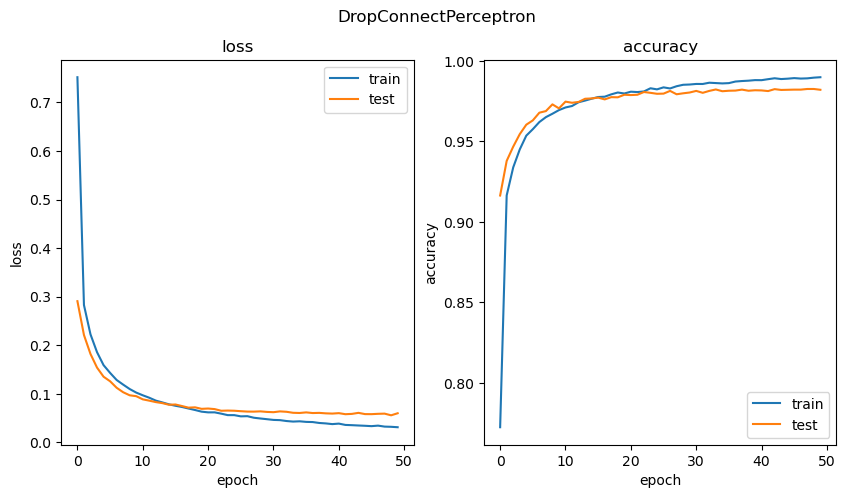

In [7]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id f88a1326-cd54-4504-96c0-243e11943258

#### Results for Perceptron:
- Average loss: 0.0106 (train), 0.0595 (test)
- Average accuracy: 0.9964 (train), 0.9864 (test)

#### Results for DropConnectPerceptron:
- Average loss: 0.0312 (train), 0.0599 (test)
- Average accuracy: 0.9899 (train), 0.9821 (test)

In [ ]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id 

#### Results for Perceptron:

#### Results for DropConnectPerceptron:

In [8]:
loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=128,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=128,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

Running experiment Perceptron with id 8079a652-1764-4683-b7d2-17fdc3dd46f1
Tensorboard logs are saved in logs/Perceptron-8079a652-1764-4683-b7d2-17fdc3dd46f1
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntropy

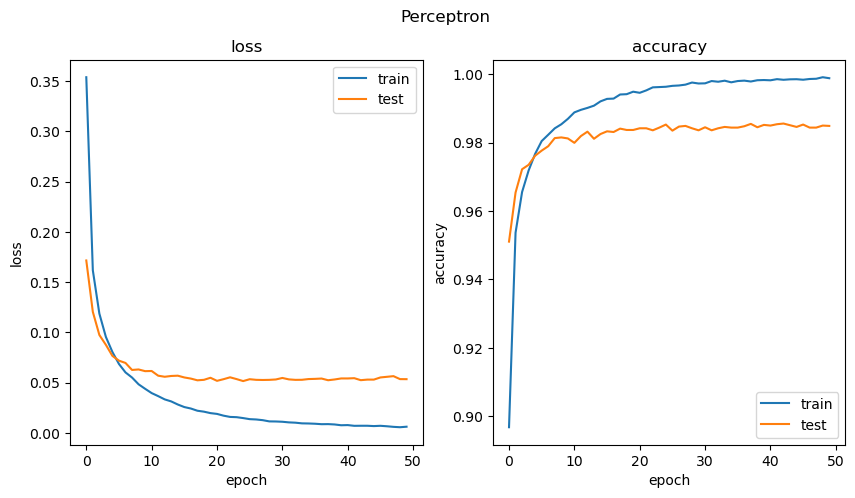

Running experiment DropConnectPerceptron with id 8079a652-1764-4683-b7d2-17fdc3dd46f1
Tensorboard logs are saved in logs/DropConnectPerceptron-8079a652-1764-4683-b7d2-17fdc3dd46f1
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maxi

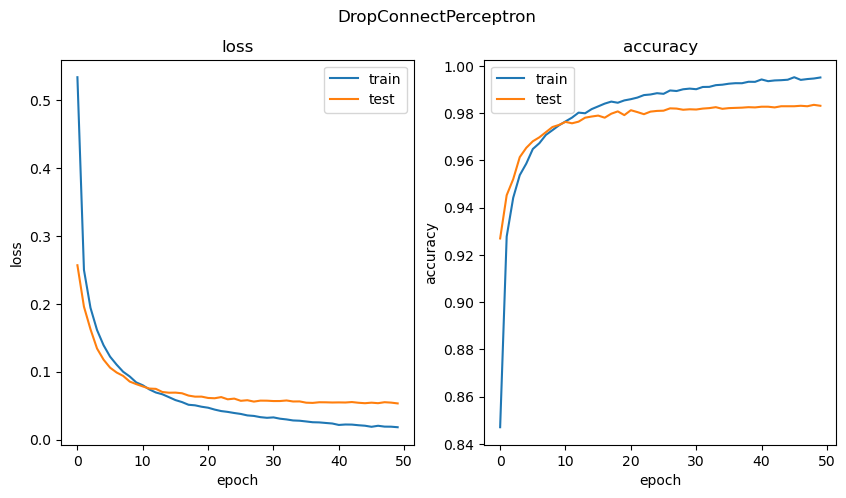

In [9]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id 

#### Results for Perceptron:
- Average loss: 0.0061 (train), 0.0534 (test)
- Average accuracy: 0.9988 (train), 0.9849 (test)

#### Results for DropConnectPerceptron:
- Average loss: 0.0183 (train), 0.0533 (test)
- Average accuracy: 0.9951 (train), 0.9831 (test)

Running experiment Perceptron with id 3e56829e-bc6c-412e-8f9c-632f8e583f20
Tensorboard logs are saved in logs/Perceptron-3e56829e-bc6c-412e-8f9c-632f8e583f20
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.99
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

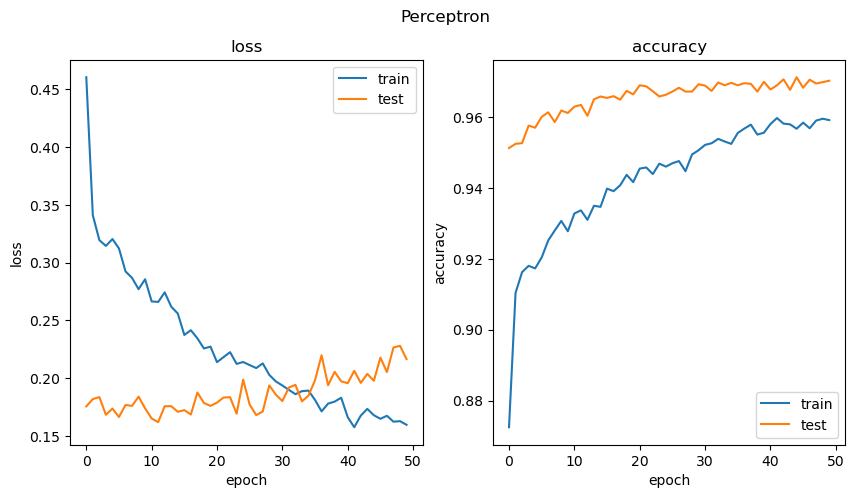

Running experiment DropConnectPerceptron with id 3e56829e-bc6c-412e-8f9c-632f8e583f20
Tensorboard logs are saved in logs/DropConnectPerceptron-3e56829e-bc6c-412e-8f9c-632f8e583f20
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maxi

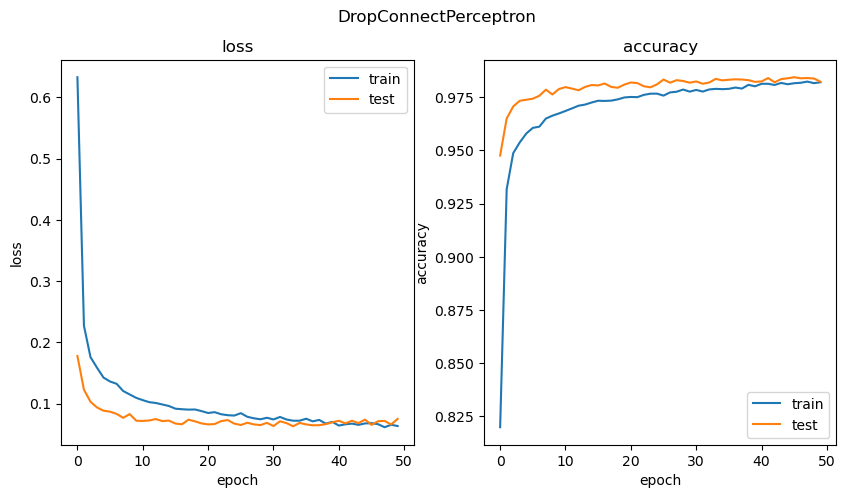

In [10]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id 

#### Results for Perceptron:
- Average loss: 0.1597 (train), 0.2166 (test)
- Average accuracy: 0.9591 (train), 0.9702 (test)

#### Results for DropConnectPerceptron:
- Average loss: 0.0633 (train), 0.0749 (test)
- Average accuracy: 0.9820 (train), 0.9823 (test)

In [ ]:
from uuid import uuid4
experiment = uuid4()

model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.99)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

### Runing experiment with id 

#### Results for Perceptron:

#### Results for DropConnectPerceptron: